In [ ]:
!pip install tensorflow_gpu==1.15

In [5]:
import tensorflow as tf
from tensorboard.plugins.hparams.api import KerasCallback
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

Using TensorFlow backend.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
if __name__ == '__main__':
    data = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = data.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    train_images = train_images.reshape(60000, 28, 28, 1)
    # test_images = np.pad(test_images, ((0,0), (98, 98), (98, 98), (0,0)), mode='constant', constant_values = (0,0))
    # train_images = np.pad(train_images, ((0, 0), (98, 98), (98, 98), (0, 0)), mode='constant', constant_values=(0, 0))

    print(len(train_images))
    print(test_images.shape)

4423680/4422102 [==============================] - 0s 0us/step
60000
(10000, 28, 28, 1)


In [8]:
    model = keras.Sequential()
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Flatten())
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         2

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_images.reshape(60000, 28, 28, 1), train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 2.3029 - acc: 0.0963
Epoch 2/10
60000/60000 [==============================] - 59s 983us/sample - loss: 2.3028 - acc: 0.0989
Epoch 3/10
60000/60000 [==============================] - 59s 991us/sample - loss: 2.3028 - acc: 0.1003
Epoch 4/10
60000/60000 [==============================] - 60s 1000us/sample - loss: 2.3028 - acc: 0.0969
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 2.3027 - acc: 0.1003
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 2.3028 - acc: 0.0994
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 2.3028 - acc: 0.0992
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 2.3028 - acc: 0.0971
Epoch 9/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 2.3028 - acc: 0.0993
Epoch 10/10
60000/60000 [===========================

In [6]:
model.save("vgg16_weights.h5")
weights = model.get_weights()
print(weights)


[array([[[[-0.07361551,  0.06848998, -0.07827321,  0.05559418,
           0.07966344,  0.02230323,  0.04207075, -0.04389849,
           0.00913659, -0.04941441, -0.06498572, -0.03680256,
           0.00095145, -0.03170603, -0.06026036, -0.03332538,
          -0.0459118 ,  0.05792083, -0.07374266, -0.06865054,
          -0.03797671, -0.0196336 , -0.08823315, -0.06231329,
           0.01319814, -0.07143687, -0.06263056, -0.05076103,
           0.10050763, -0.0798441 ,  0.00520699,  0.06171282,
           0.02451654, -0.03133702, -0.01888163,  0.04817846,
          -0.09686901, -0.05911632, -0.00749213,  0.02204552,
           0.01084861, -0.04269797, -0.01230377, -0.05976359,
          -0.04323509,  0.00900237,  0.06661955,  0.03307663,
           0.08957651,  0.04384421,  0.082983  , -0.0771345 ,
          -0.08381736,  0.03077684,  0.0773837 , -0.00972326,
           0.02253245, -0.0584902 , -0.06331825,  0.0720291 ,
          -0.06162056,  0.02339394, -0.01306346, -0.0799021 ]],

    

In [14]:
i = 0
import sys
import numpy
#numpy.set_printoptions(threshold=sys.maxsize)

with open("weights.txt", "w") as txt_file:
  for layer in model.layers:
      weights = layer.get_weights() # list of numpy arrays
      txt_file.write(str(i) + " " + str(weights))
      i+=1



In [3]:
test_loss, test_acc = model.evaluate(test_images.reshape(10000, 28, 28, 1), test_labels)
print("our accuracy is ", test_acc)


In [ ]:
    prediction = model.predict(test_images)
    for i in range(5):
            plot.grid(False)
            plot.imshow(test_images[i], cmap=plot.cm.binary)
            plot.xlabel("Actual: " + class_names[test_labels[i]])
            plot.title("Prediction: " + class_names[np.argmax(prediction[i])])
            plot.show()

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
60000
(10000, 28, 28, 1)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (Ma

TypeError: ignored

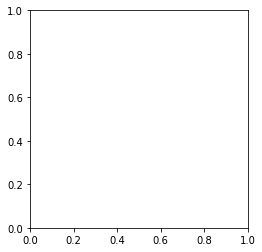

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams.api import KerasCallback
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

if __name__ == '__main__':
    data = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = data.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    train_images = train_images.reshape(60000, 28, 28, 1)
    # test_images = np.pad(test_images, ((0,0), (98, 98), (98, 98), (0,0)), mode='constant', constant_values = (0,0))
    # train_images = np.pad(train_images, ((0, 0), (98, 98), (98, 98), (0, 0)), mode='constant', constant_values=(0, 0))

    print(len(train_images))
    print(test_images.shape)
    # model = keras.models.load_model('Trail.h5')

    # lets do our architecture
    # sequential is we put our layers in sequence

    model = keras.Sequential()
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Flatten())
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    model.summary()
    # adam and loss function here are standard we may look at these later and how do they work
    # accuracy this is what we want to measure how accurate is our network
    # compile to give the model some parameters

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True,
    #                              save_weights_only=False, mode='auto', period=1)
    # early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
    # hist = model.fit_generator(steps_per_epoch=100, generator=train_images, validation_data=test_images, validation_steps=10,
    #                            epochs=100, callbacks=[checkpoint, early])

    # this is used to train our network check what epochs is in the copybook

    model.fit(train_images.reshape(60000, 28, 28, 1), train_labels, epochs=10)

    # now its time to check how our network works so we will see the accuracy
    test_loss, test_acc = model.evaluate(test_images.reshape(10000, 28, 28, 1), test_labels)
    print("our accuracy is ", test_acc)



    prediction = model.predict(test_images)
    for i in range(5):
            plot.grid(False)
            plot.imshow(test_images[i], cmap=plot.cm.binary)
            plot.xlabel("Actual: " + class_names[test_labels[i]])
            plot.title("Prediction: " + class_names[np.argmax(prediction[i])])
            plot.show()
    model.save("vgg16_weights.h5")
    weights = model.get_weights()
    print(weights)

